In [1]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras import Sequential
from keras.layers import Bidirectional
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import RepeatVector
from keras.layers import Input
import keras.utils as utils
from keras import Model
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Conv2DTranspose
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras import callbacks
import keras

Using TensorFlow backend.


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [108]:
converter = Sequential()
converter.add(BatchNormalization(axis=-1,input_shape =(48, 64, 32)))
converter.add(Conv2D(32,(3,3), strides =2,padding = "same", activation = "tanh"))
converter.add(Reshape((768,32)))
converter.add(Bidirectional(LSTM(256, return_sequences = True)))
converter.add(LSTM(128, return_sequences = True))
converter.add(LSTM(64, return_sequences = True))
converter.add(LSTM(32, return_sequences = True))
converter.add(LSTM(8))
opt = keras.optimizers.Adam(learning_rate=0.0001)
converter.compile(optimizer=opt, loss="mse")

In [112]:
checkpoint_filepath = 'crying_converter_weights.{loss:.5f}.hdf5'
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='accuracy',
    mode='max',
    save_best_only=False)

In [7]:
from random import sample

In [8]:
import keras

In [103]:
caption_autoencoder = keras.models.load_model("tiny_caption_autoencoder_weights.0.79838.hdf5")

In [121]:
caption_encoder = Model(inputs=caption_autoencoder.inputs, outputs=caption_autoencoder.layers[7].output)

In [122]:
caption_encoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9_input (InputLaye (None, 78)                0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 78, 150)           3001650   
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 78, 256)           285696    
_________________________________________________________________
dropout_9 (Dropout)          (None, 78, 256)           0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 78, 128)           197120    
_________________________________________________________________
lstm_48 (LSTM)               (None, 78, 64)            49408     
_________________________________________________________________
dropout_10 (Dropout)         (None, 78, 64)            0   

In [36]:
image_autoencoder = keras.models.load_model("tanh_weights.0.00308.hdf5")

In [38]:
image_encoder = Model(inputs=image_autoencoder.inputs, outputs=image_autoencoder.layers[6].output)

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("results.csv", sep = "|")

In [15]:
df.dropna(inplace=True)

In [16]:
import pickle

In [17]:
df

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
...,...,...,...
158910,998845445.jpg,0,A man in shorts and a Hawaiian shirt leans ov...
158911,998845445.jpg,1,"A young man hanging over the side of a boat ,..."
158912,998845445.jpg,2,A man is leaning off of the side of a blue an...
158913,998845445.jpg,3,"A man riding a small boat in a harbor , with ..."


In [18]:
dumpy=open('captions.pickle','rb')

In [19]:
caption_data=pickle.load(dumpy)

In [20]:
dumpy.close()

In [21]:
mapp=[]

In [22]:
x = set()

In [23]:
names = list(df['image_name'])

In [24]:
import os
directory=r'C:\Users\Achyuta Rajaram\Dropbox (Phillips Exeter)\IMAGECAPTIONING\flickr30k_images'
for l in range(len(names)):
    if names[l] not in x:
        mapp.append([os.path.join(directory,names[l]),str(df.loc[df.image_name==names[l]].index[0])])
        x.add(names[l])

In [25]:
train_map = sample(mapp,27000)

In [26]:
from tqdm import trange

In [113]:
def train(wow, epochs):
    for epoch in range(epochs):
        t = trange(1687)
        for batch in t:
            sampl = sample(train_map,16)
            image_data = []
            caption_dats=[]
            history = "hi"
            for file in sampl:
                img = cv2.imread(file[0])
                converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
                image_data.append(converted)
                caption_dats.append(caption_data[int(file[1])])
            image_encoded=image_encoder.predict(np.array(image_data))
            captions_encoded=caption_encoder.predict(np.array(caption_dats))
            if batch==1686:
                history=wow.fit(image_encoded,captions_encoded,callbacks=[model_checkpoint_callback])
                t.set_description(str(history.history["loss"]))
            else:
                history=wow.fit(image_encoded,captions_encoded,verbose=0)
                t.set_description(str(history.history["loss"]))

In [28]:
import cv2
import numpy as np

In [126]:
caption_autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 78, 150)           3001650   
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 78, 256)           285696    
_________________________________________________________________
dropout_9 (Dropout)          (None, 78, 256)           0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 78, 128)           197120    
_________________________________________________________________
lstm_48 (LSTM)               (None, 78, 64)            49408     
_________________________________________________________________
dropout_10 (Dropout)         (None, 78, 64)            0         
_________________________________________________________________
lstm_49 (LSTM)               (None, 78, 32)           

In [124]:
train(converter,1)

[0.014797056093811989]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1686/1687 [2:17:14<00:04,  4.91s/it]

Epoch 1/1
16/16 [==============================] - 3s 201ms/step - loss: 0.0113


[0.011281261220574379]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1687/1687 [2:17:19<00:00,  4.88s/it]


In [68]:
model = keras.models.load_model("converter_weights.0.05222.hdf5")

In [146]:
file = mapp[420]
image_data=[]
caption_dats=[]
img = cv2.imread(file[0])
converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
image_data.append(converted)
caption_dats.append(caption_data[int(file[1])])
image_encoded=image_encoder.predict(np.array(image_data))
captions_encoded=caption_encoder.predict(np.array(caption_dats))

In [131]:
decoder_input = Input(caption_autoencoder.layers[8].input_shape[1:])
decoder = decoder_input
for layer in caption_autoencoder.layers[8:]:
    decoder = layer(decoder)
decoder = Model(inputs=decoder_input, outputs=decoder)

In [147]:
np.argmax(decoder.predict(captions_encoded).reshape(78,20011), axis = 1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  6,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  3, 83], dtype=int64)

In [148]:
np.argmax(decoder.predict(converter.predict(image_encoded)).reshape(78,20011), axis = 1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18,  6,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 33], dtype=int64)

In [77]:
file = open('tokenizer.pickle','rb')

In [78]:
tokenizer = pickle.load(file)

In [79]:
file.close()

In [149]:
tokenizer.sequences_to_texts([list(np.argmax(decoder.predict(converter.predict(image_encoded)).reshape(78,20011), axis = 1))])

['a young man in a a a a a a a a a street']

In [150]:
tokenizer.sequences_to_texts([list(np.argmax(decoder.predict(captions_encoded).reshape(78,20011), axis = 1))])

['a man in a a a a a a a a a a a a a a a a a the background']

In [144]:

tokenizer.sequences_to_texts([caption_data[int(file[1])]])

['two young guys with shaggy hair look at their hands while hanging out in the yard']

In [83]:
import matplotlib.pyplot

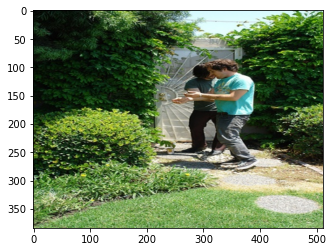

In [145]:
matplotlib.pyplot.imshow(np.array(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255))